<a href="https://colab.research.google.com/github/nikitabelii/FinFind-SafeGuard/blob/main/Working_Alexnet__Slides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
import wandb as wb

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=device)

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image, size=224):
    means = [0.485, 0.456, 0.406]
    stds = [0.229, 0.224, 0.225]
    transform = transforms.Compose([
        transforms.Resize(size),
        transforms.CenterCrop(size),
        transforms.ToTensor(),
        transforms.Normalize(means, stds)
    ])
    tensor = transform(image).unsqueeze(0).to(device)
    tensor.requires_grad = True
    return tensor



In [16]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [17]:
url = "https://docs.google.com/presentation/d/1GCEIlXu9bqusEShnHxgG5mU2u6IF6JgzBkYBzqsDLYo/edit#slide=id.g206f8279a60_0_0"

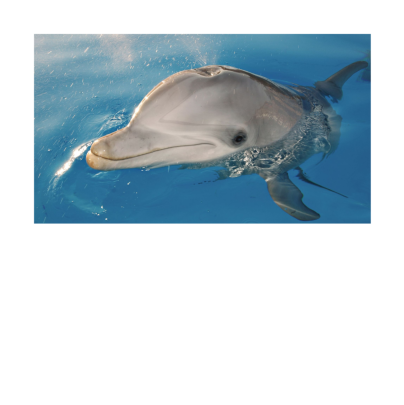

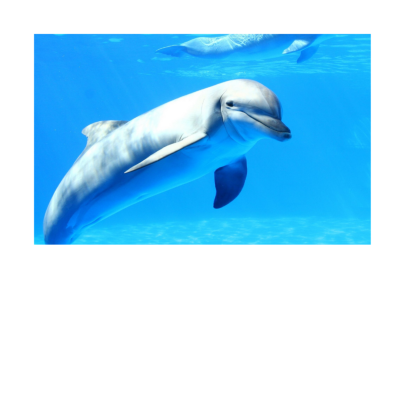

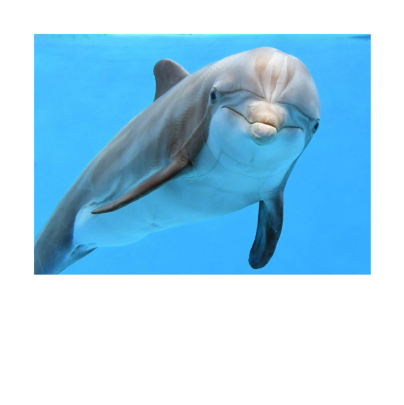

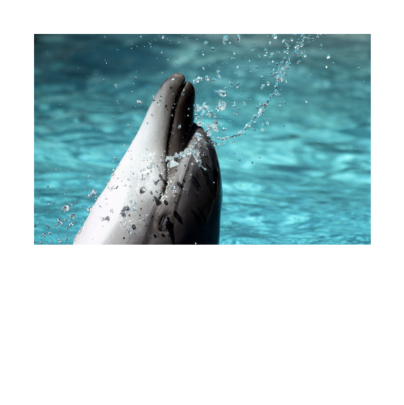

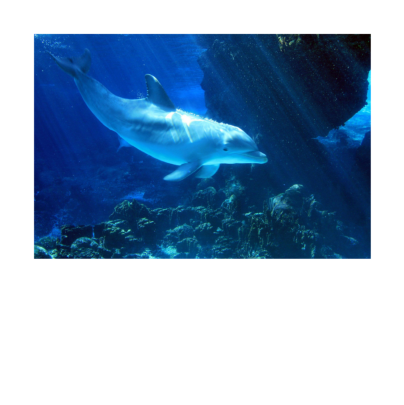

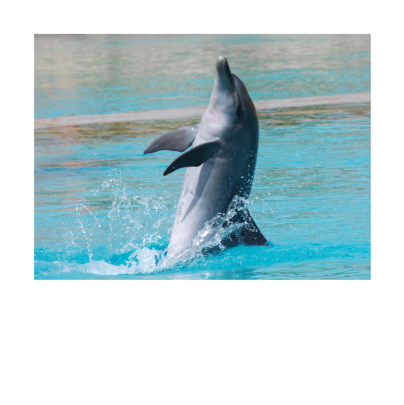

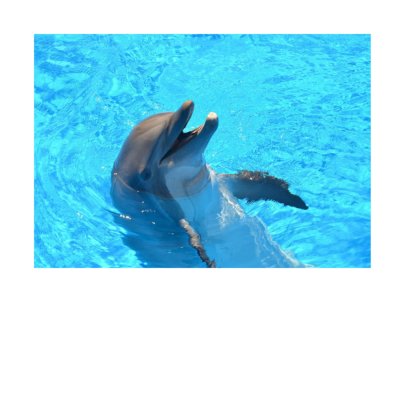

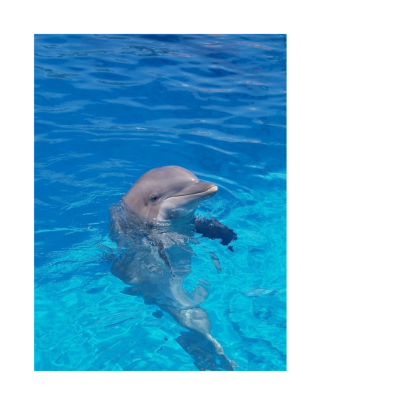

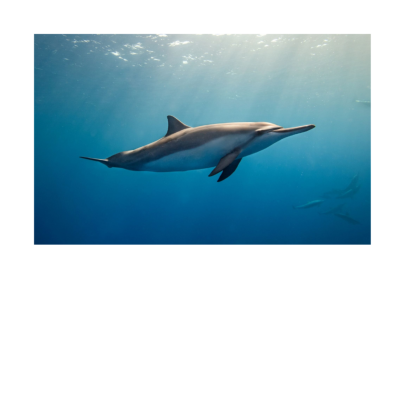

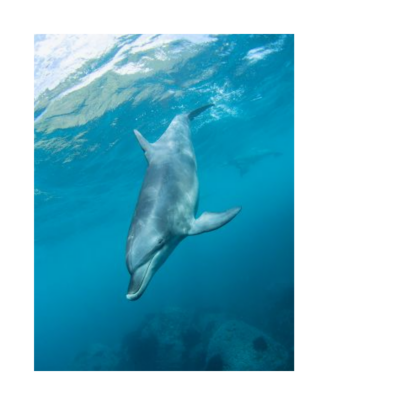

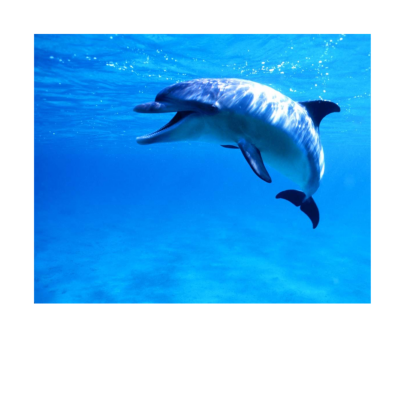

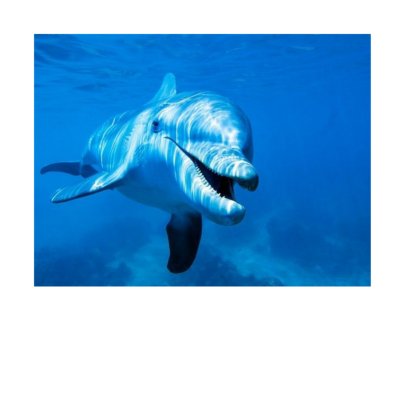

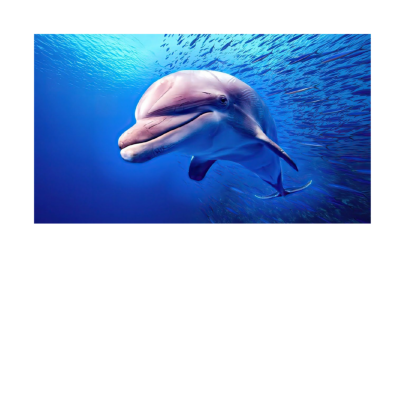

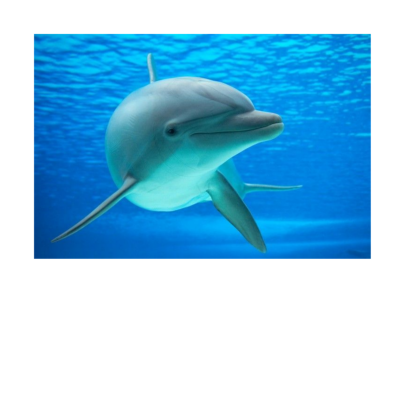

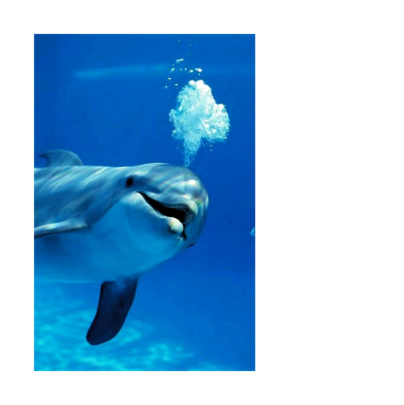

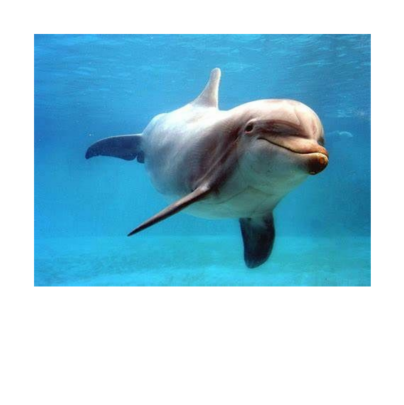

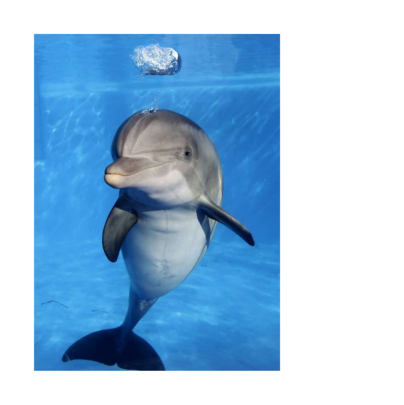

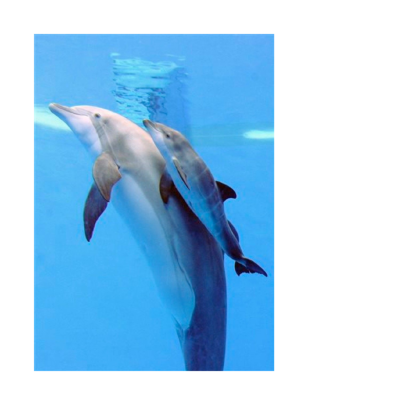

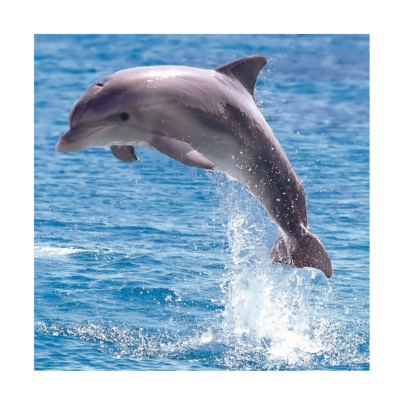

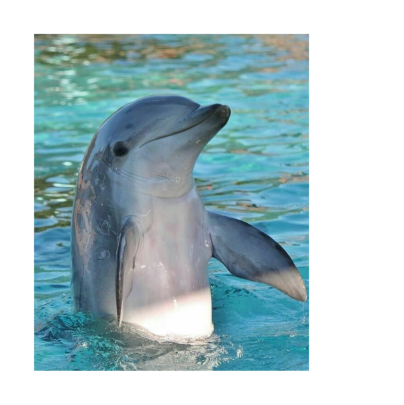

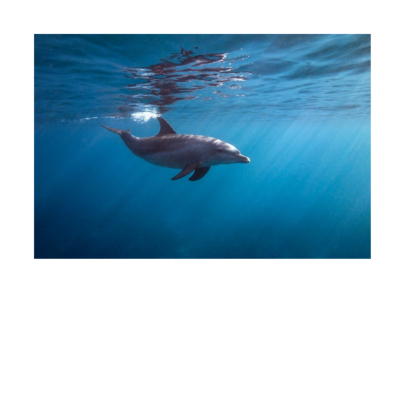

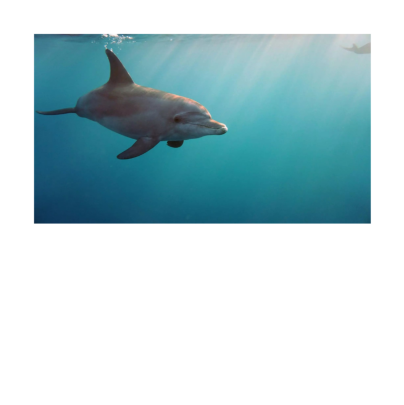

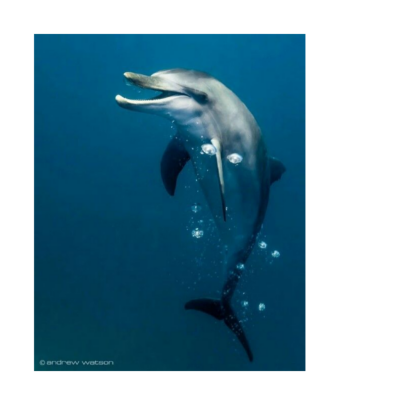

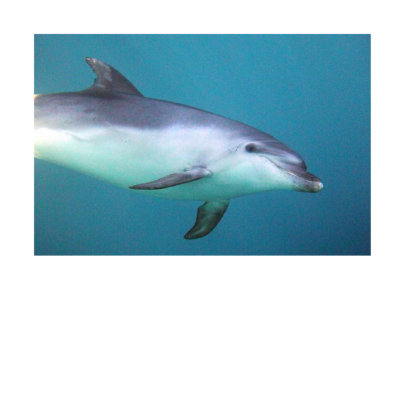

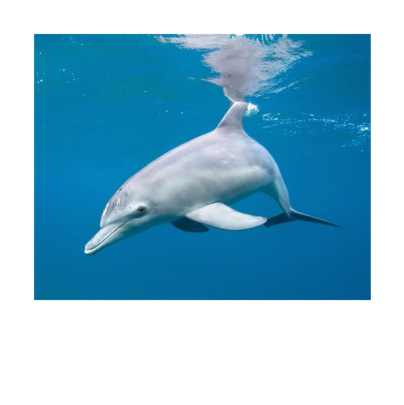

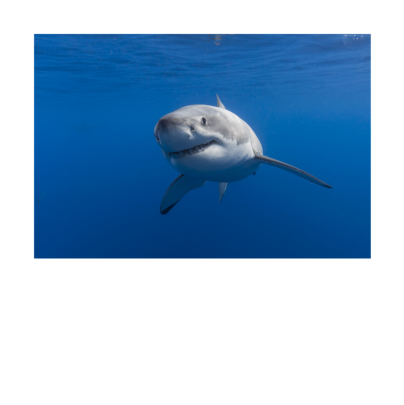

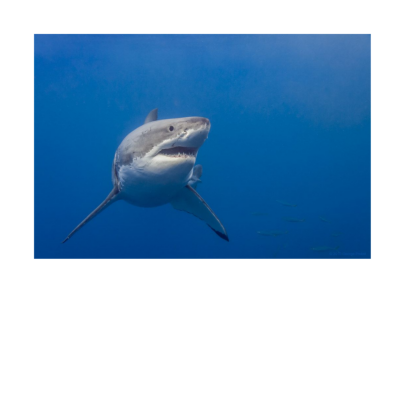

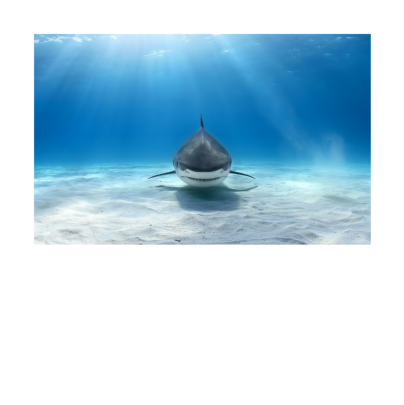

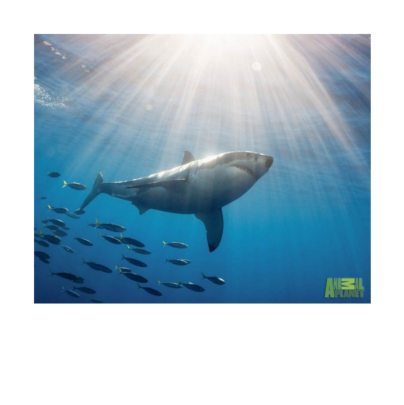

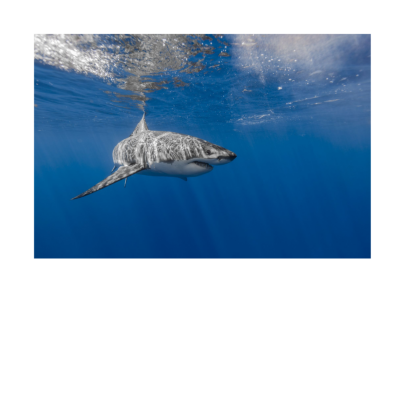

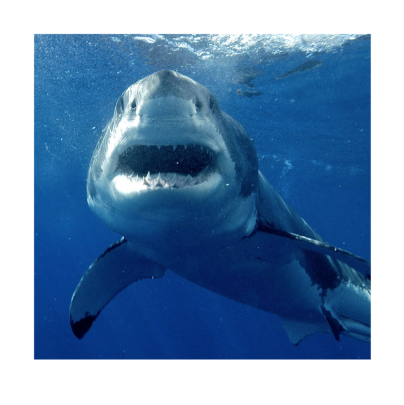

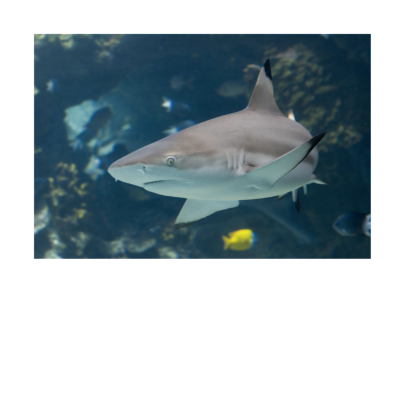

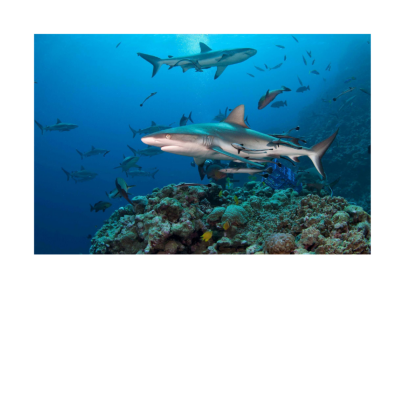

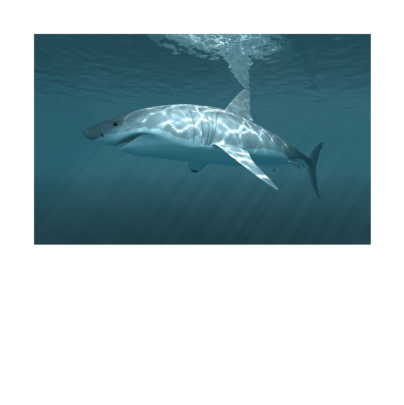

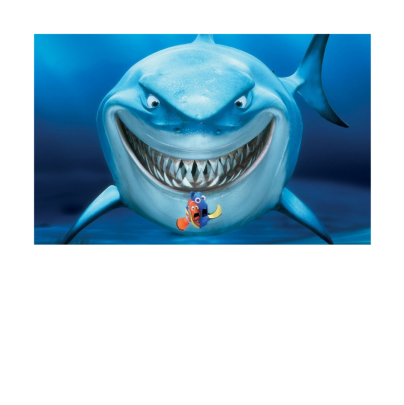

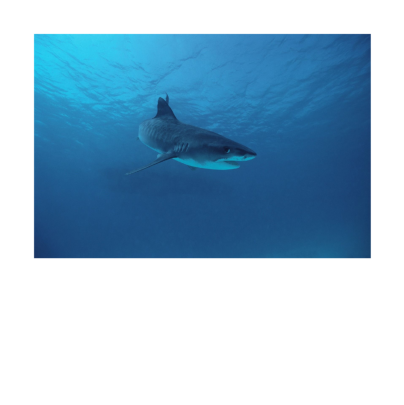

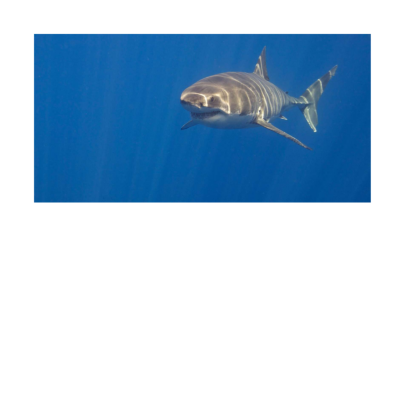

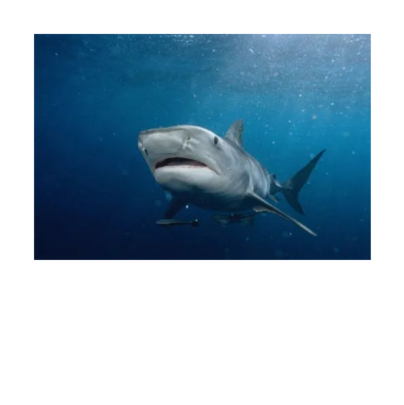

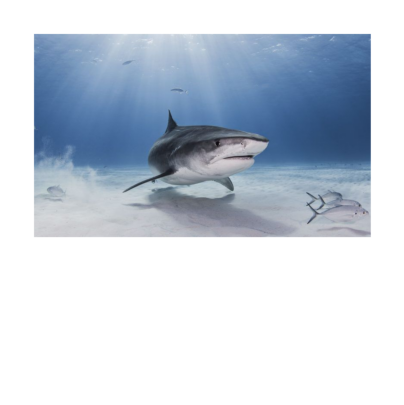

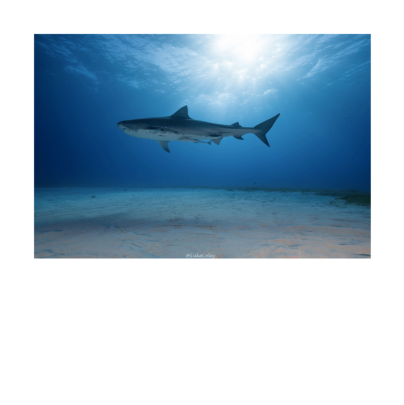

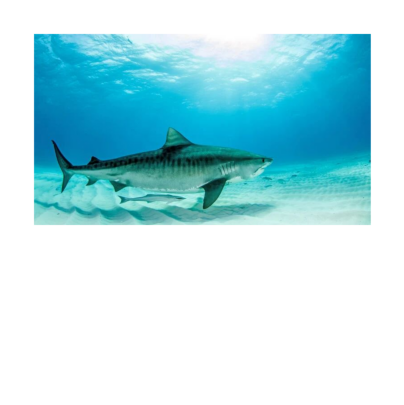

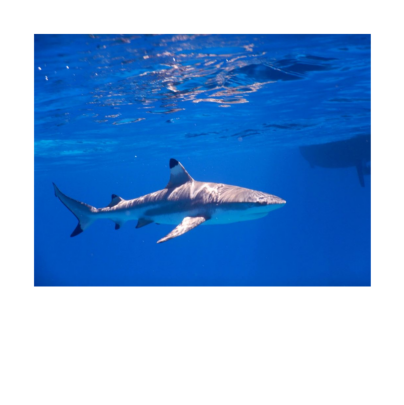

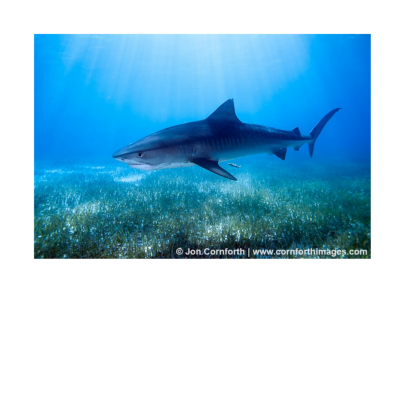

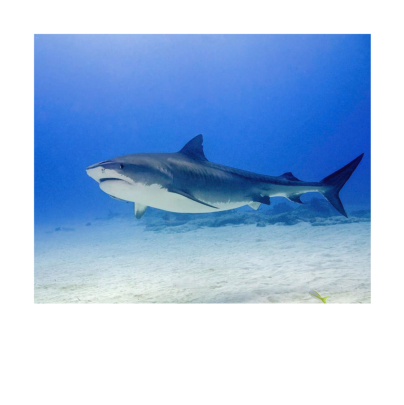

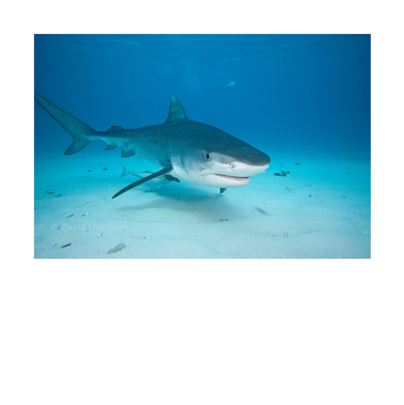

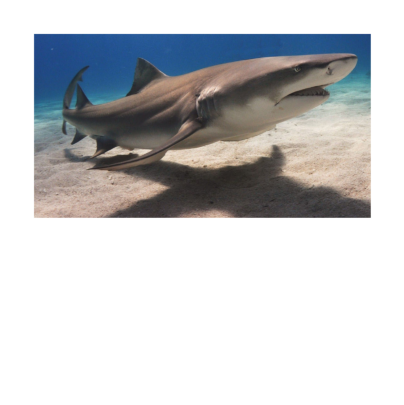

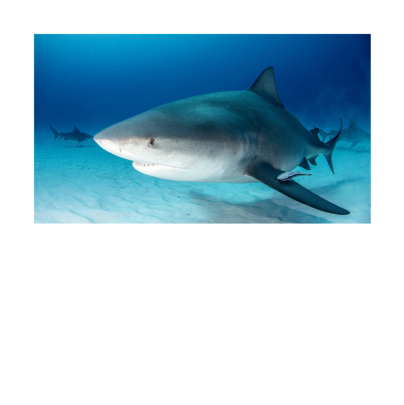

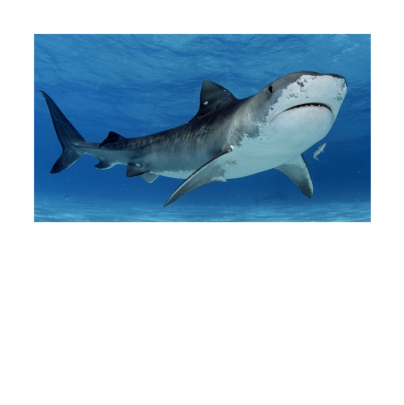

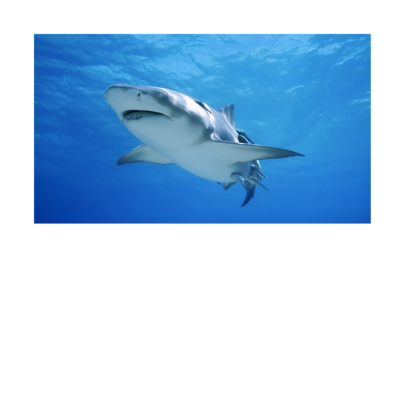

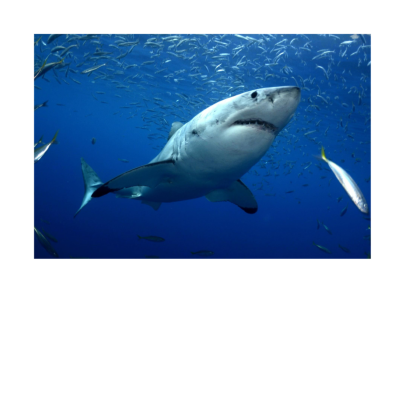

In [19]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [20]:
images.shape

torch.Size([50, 3, 224, 224])

In [21]:
model(images)

tensor([[ 1.3289, -3.6835,  7.9183,  ..., -0.8090, -1.2737,  0.2835],
        [-2.7681, -1.1337,  2.5914,  ..., -2.7086, -0.7961,  5.0964],
        [ 1.5679, -1.1900,  1.6420,  ..., -0.4569, -1.0782,  3.3965],
        ...,
        [-0.7045, -1.2759,  2.6942,  ..., -0.9918,  0.0671,  2.7297],
        [-2.3161, -2.2653,  4.9491,  ..., -3.6048, -0.5270,  0.5817],
        [ 0.9261,  0.1276,  5.6543,  ..., -0.5696, -0.7334,  1.8576]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [22]:
y = model(images)

In [23]:
y.shape

torch.Size([50, 1000])

In [24]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [25]:
for i in list(guesses):
    print(labels[i])

Weimaraner
iron, smoothing iron
dugong, Dugong dugon
grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus
monitor
killer whale, killer, orca, grampus, sea wolf, Orcinus orca
platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus
dugong, Dugong dugon
projectile, missile
dugong, Dugong dugon
albatross, mollymawk
dugong, Dugong dugon
quill, quill pen
dugong, Dugong dugon
can opener, tin opener
spoonbill
spotlight, spot
dugong, Dugong dugon
grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus
killer whale, killer, orca, grampus, sea wolf, Orcinus orca
platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus
airship, dirigible
corkscrew, bottle screw
barracouta, snoek
dugong, Dugong dugon
dugong, Dugong dugon
dugong, Dugong dugon
white wolf, Arctic wolf, Canis lupus tundrarum
dugong, Dugong dugon
dugong, Dugong dugon
great white shark, white shark, man-eater, man-eating shar

In [26]:
Y = np.zeros(50,)
Y[25:] = 1

In [27]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [28]:
# Y = np.zeros(100,)
# Y[50:] = 1

In [29]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [30]:
X = y.detach().cpu().numpy()

In [31]:
X.shape

(50, 1000)

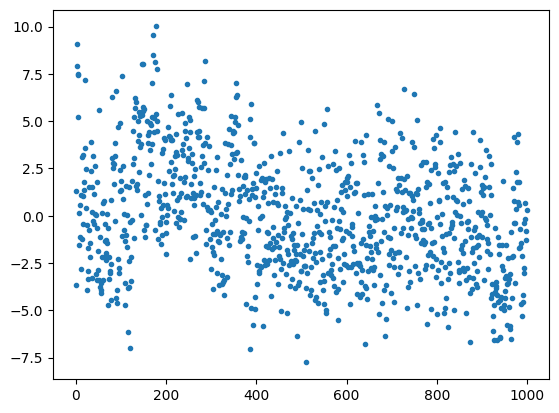

In [32]:
plt.plot(X[0],'.')

(array([ 15.,  57., 166., 213., 196., 173., 107.,  53.,  16.,   4.]),
 array([-7.75531101, -5.97957039, -4.20382977, -2.42808938, -0.65234888,
         1.12339163,  2.89913225,  4.67487288,  6.45061302,  8.22635365,
        10.00209427]),
 <BarContainer object of 10 artists>)

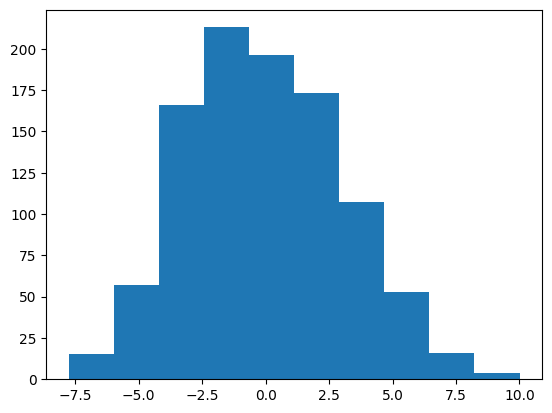

In [33]:
plt.hist(X[0])

In [34]:
X = GPU_data(X)
Y = GPU_data(Y)

In [35]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [36]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [37]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [38]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [39]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [40]:
X.shape

torch.Size([50, 1000])

In [41]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [42]:
def model(x,w):

    return x@w[0]

In [43]:
def make_plots():

    acc_train = acc(model(x,w),y)

    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [44]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-12-13a1dae5b345>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)
